# Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

import pickle as pkl
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score

import keras
import tensorflow as tf

import random

# Preprocessing

In [2]:
dataset = '/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv'

In [3]:
df = pd.read_csv(dataset)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.shape

(6607, 20)

In [5]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(6378, 20)

<Axes: >

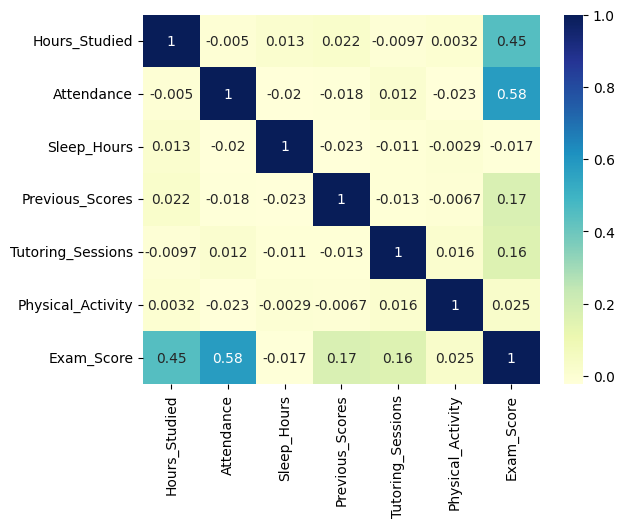

In [10]:
sb.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)

In [11]:
df = pd.get_dummies(
    df, 
    columns=['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender'], 
    dtype='int'
)

In [12]:
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,7,73,0,3,67,0,1,0,...,1,0,0,1,0,0,0,1,0,1
1,19,64,8,59,2,4,61,0,1,0,...,1,0,1,0,0,0,1,0,1,0
2,24,98,7,91,2,4,74,0,0,1,...,1,0,0,0,1,0,0,1,0,1
3,29,89,8,98,1,4,71,0,1,0,...,1,0,0,1,0,0,1,0,0,1
4,19,92,6,65,3,4,70,0,0,1,...,1,0,1,0,0,0,0,1,1,0


In [13]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score',
       'Parental_Involvement_High', 'Parental_Involvement_Low',
       'Parental_Involvement_Medium', 'Access_to_Resources_High',
       'Access_to_Resources_Low', 'Access_to_Resources_Medium',
       'Extracurricular_Activities_No', 'Extracurricular_Activities_Yes',
       'Motivation_Level_High', 'Motivation_Level_Low',
       'Motivation_Level_Medium', 'Internet_Access_No', 'Internet_Access_Yes',
       'Family_Income_High', 'Family_Income_Low', 'Family_Income_Medium',
       'Teacher_Quality_High', 'Teacher_Quality_Low', 'Teacher_Quality_Medium',
       'School_Type_Private', 'School_Type_Public', 'Peer_Influence_Negative',
       'Peer_Influence_Neutral', 'Peer_Influence_Positive',
       'Learning_Disabilities_No', 'Learning_Disabilities_Yes',
       'Parental_Education_Level_College',
       'Parental_Education_Level_High School',
       'Parenta

In [14]:
df.shape

(6378, 41)

<Axes: >

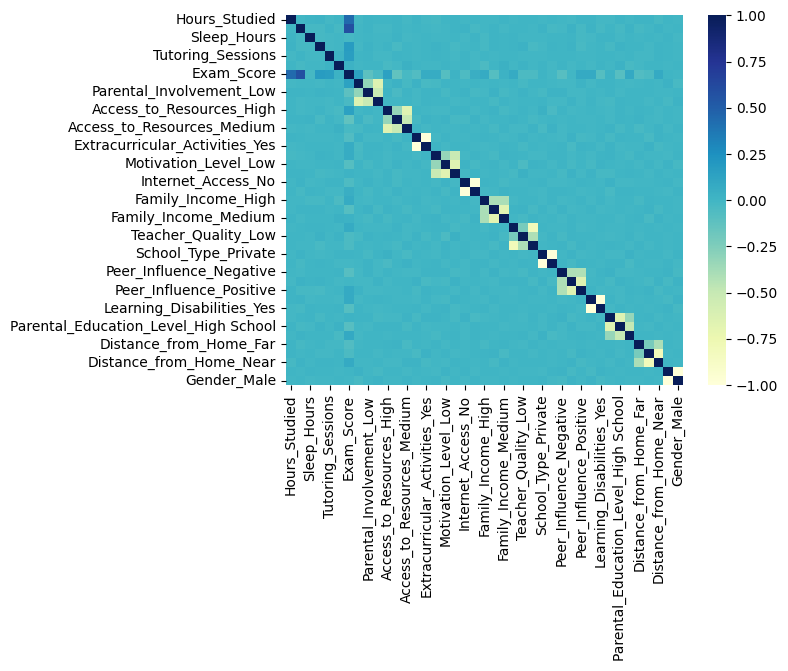

In [15]:
sb.heatmap(df.corr(numeric_only=True), cmap="YlGnBu")

## Normalization

In [16]:
df_main = df.copy()
minmax_list = [] # [[min, max], ...]

In [17]:
STANDARD_COLS = 7
for i in range(STANDARD_COLS):
    column = df_main.columns[i]
    _min = df_main[column].min()
    _max = df_main[column].max()
    
    df_main[column] = (df_main[column] - _min) / (_max - _min) 
    
    minmax_list.append([_min, _max])

In [18]:
with open('/kaggle/working/minmax.pkl', 'wb') as f:
    pkl.dump(minmax_list, f)

In [19]:
df_main.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,0.511628,0.600,0.500000,0.46,0.000,0.500000,0.260870,0,1,0,...,1,0,0,1,0,0,0,1,0,1
1,0.418605,0.100,0.666667,0.18,0.250,0.666667,0.130435,0,1,0,...,1,0,1,0,0,0,1,0,1,0
2,0.534884,0.950,0.500000,0.82,0.250,0.666667,0.413043,0,0,1,...,1,0,0,0,1,0,0,1,0,1
3,0.651163,0.725,0.666667,0.96,0.125,0.666667,0.347826,0,1,0,...,1,0,0,1,0,0,1,0,0,1
4,0.418605,0.800,0.333333,0.30,0.375,0.666667,0.326087,0,0,1,...,1,0,1,0,0,0,0,1,1,0


## Classification (Additional Steps)

In [20]:
df_super = df_main.copy()
df_super.drop('Exam_Score', axis=1, inplace=True)

In [21]:
df_super.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,0.511628,0.600,0.500000,0.46,0.000,0.500000,0,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,0.418605,0.100,0.666667,0.18,0.250,0.666667,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
2,0.534884,0.950,0.500000,0.82,0.250,0.666667,0,0,1,0,...,1,0,0,0,1,0,0,1,0,1
3,0.651163,0.725,0.666667,0.96,0.125,0.666667,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
4,0.418605,0.800,0.333333,0.30,0.375,0.666667,0,0,1,0,...,1,0,1,0,0,0,0,1,1,0


In [22]:
series_score = df.loc[:, 'Exam_Score'].copy()

In [23]:
series_score.head()

0    67
1    61
2    74
3    71
4    70
Name: Exam_Score, dtype: int64

In [24]:
series_score.value_counts().sort_index()

Exam_Score
55       1
56       1
57       4
58      21
59      39
60      75
61     166
62     261
63     350
64     478
65     650
66     722
67     692
68     738
69     599
70     526
71     398
72     298
73     133
74     102
75      48
76      16
77       5
78       4
79       3
80       5
82       4
83       1
84       3
85       1
86       4
87       2
88       3
89       3
91       1
92       2
93       2
94       4
95       2
96       1
97       3
98       3
99       2
100      1
101      1
Name: count, dtype: int64

In [25]:
bins = [50, 60, 65, 70, 75, 80, 110]
labels = list(range(len(bins) - 1))

In [26]:
series_score = pd.cut(series_score, bins=bins, labels=labels, right=True, include_lowest=True)

In [27]:
series_score.head()

0    2
1    1
2    3
3    3
4    2
Name: Exam_Score, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [28]:
series_score.value_counts().sort_index()

Exam_Score
0     141
1    1905
2    3277
3     979
4      33
5      43
Name: count, dtype: int64

In [29]:
series_score_ce = pd.get_dummies(series_score, dtype=int)

In [30]:
series_score_ce.head()

,0,1,2,3,4,5
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


# Training and Validation sets

## Regression

In [31]:
x = df_main.drop('Exam_Score', axis=1)
y = df_main['Exam_Score']

In [32]:
x = np.reshape(x.to_numpy(), (*x.to_numpy().shape, 1))
y = y.to_numpy()

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [34]:
x_train.shape

(5740, 40, 1)

In [35]:
y_train.shape

(5740,)

## Classification

In [36]:
x1 = df_super
y1 = series_score_ce

In [37]:
x1 = np.reshape(x1.to_numpy(), (*x1.to_numpy().shape, 1))
y1 = y1.to_numpy()

In [38]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.1, random_state=42)

In [39]:
x1_train.shape

(5740, 40, 1)

In [40]:
y1_train.shape

(5740, 6)

In [41]:
y2 = series_score.to_numpy()

In [42]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x1, y2, test_size=0.1, random_state=42)

In [43]:
x2_train.shape

(5740, 40, 1)

In [44]:
y2_train.shape

(5740,)

# Model

In [45]:
def check_path(dir):
    if not os.path.exists(dir):
        os.mkdir(dir)

In [46]:
model_save_dir = '/kaggle/working/Model_Data'
check_path(model_save_dir)

model_save = f'{model_save_dir}/CNN_Regression.keras'
model_save1 = f'{model_save_dir}/CNN_1.keras'
model_save2 = f'{model_save_dir}/CNN_2.keras'

## CNN Regression
NOTE: Since, accuracy, f1 score and precision cannot be calculated from a regression model, metrics used as Mean Absolute Error and R2 Score.

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(x_train[1].shape, 1),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [48]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save, verbose=1, save_weights_only=False, save_best_only=True)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [49]:
model.compile(loss="mae", optimizer="adam", metrics=['r2_score'])

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (1, 38, 32)            │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (1, 19, 32)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (1, 608)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (1, 128)               │        77,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (1, 1)                 │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,209 (305.50 KB)

 Trainable params: 78,209 (305.50 KB)

 Non-trainable params: 0 (0.00 B)

### Training

In [51]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.25, callbacks=[cp_callback, es_callback])

Epoch 1/100
66/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0918 - r2_score: -1.3838
Epoch 1: val_loss improved from inf to 0.05753, saving model to /kaggle/working/Model_Data/CNN_Regression.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0908 - r2_score: -1.3369 - val_loss: 0.0575 - val_r2_score: 0.1274
Epoch 2/100
66/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0521 - r2_score: 0.1916
Epoch 2: val_loss improved from 0.05753 to 0.04375, saving model to /kaggle/working/Model_Data/CNN_Regression.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0520 - r2_score: 0.1940 - val_loss: 0.0438 - val_r2_score: 0.3674
Epoch 3/100
62/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0376 - r2_score: 0.4751
Epoch 3: val_loss improved from 0.04375 to 0.03406, saving model to /kaggle/working/Model_Data/CNN_Regression.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0371 - r2_score: 0.4826 - val_loss: 0.0341 - val_r2_score: 0.5426
Epoch 4/100
63/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - l

### Results

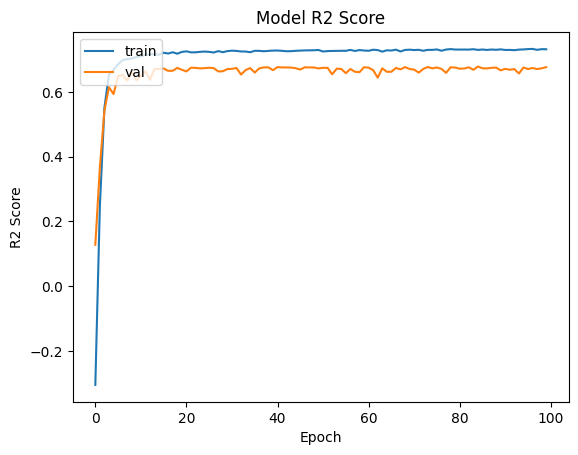

In [52]:
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])
plt.title('Model R2 Score')
plt.ylabel('R2 Score')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

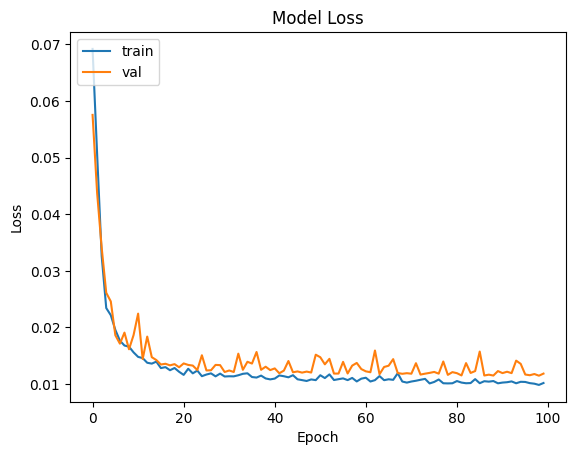

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [54]:
model.evaluate(x_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0121 - r2_score: 0.6974 


[0.011539355851709843, 0.7258032560348511]

In [55]:
model = tf.keras.models.load_model(model_save)
for i in range(5):
    idx = random.randint(0, y_test.shape[0])
    arr = x_test[idx]
    _truth = y_test[idx]
    
    val = np.reshape(arr, (1, *arr.shape))
    _predict = model.predict(val)
    
    print(f'Prediction: {np.squeeze(_predict)}, Ground Truth: {_truth}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Prediction: 0.31039154529571533, Ground Truth: 0.30434782608695654
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 0.2836931049823761, Ground Truth: 0.2826086956521739
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 0.10141519457101822, Ground Truth: 0.10869565217391304
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 0.2292231023311615, Ground Truth: 0.2391304347826087
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction: 0.18097394704818726, Ground Truth: 0.17391304347826086


In [56]:
for i in range(5):
    idx = random.randint(0, 6377)
    arr = df.iloc[idx, :].drop('Exam_Score').to_numpy(dtype='float32')
    _truth = df.iloc[idx, :]['Exam_Score']

    with open('/kaggle/working/minmax.pkl', 'rb') as f:
        minmax_list = pkl.load(f)
    
    for j, (_min, _max) in enumerate(minmax_list[:-1]):
        arr[j] = (arr[j] - _min) / (_max - _min) 

    val = np.reshape(arr, (1, *arr.shape, 1))
    _predict = model.predict(val)
    
    result_min, result_max = minmax_list[-1]
    _predict = np.squeeze((_predict * (result_max - result_min)) + result_min)
    
    print(f'Prediction: {_predict}, Rounded Prediction: {np.round_(_predict)}, Ground Truth: {_truth}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 65.71958923339844, Rounded Prediction: 66.0, Ground Truth: 66
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: 71.49618530273438, Rounded Prediction: 71.0, Ground Truth: 72
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: 69.32051849365234, Rounded Prediction: 69.0, Ground Truth: 69
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 61.974403381347656, Rounded Prediction: 62.0, Ground Truth: 62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: 66.44490051269531, Rounded Prediction: 66.0, Ground Truth: 66


## CNN Classification

## CNN 1

In [57]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(x1_train[1].shape, 1),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(6, activation="softmax")
])

In [58]:
cp_callback1 = tf.keras.callbacks.ModelCheckpoint(model_save1, verbose=1, save_weights_only=False, save_best_only=True)
es_callback1 = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [59]:
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy', 'f1_score', 'precision'])

#### Training

In [60]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (1, 38, 32)            │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (1, 19, 32)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (1, 608)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1, 128)               │        77,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (1, 6)                 │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,854 (308.02 KB)

 Trainable params: 78,854 (308.02 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
history1 = model1.fit(x1_train, y1_train, epochs=100, batch_size=64, validation_split=0.25, callbacks=[cp_callback1, es_callback1])

Epoch 1/100
59/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4892 - f1_score: 0.1331 - loss: 1.2472 - precision: 0.4655 
Epoch 1: val_loss improved from inf to 1.09361, saving model to /kaggle/working/Model_Data/CNN_1.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4933 - f1_score: 0.1345 - loss: 1.2331 - precision: 0.4733 - val_accuracy: 0.5059 - val_f1_score: 0.1120 - val_loss: 1.0936 - val_precision: 0.5502
Epoch 2/100
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5416 - f1_score: 0.1545 - loss: 1.0698 - precision: 0.5646
Epoch 2: val_loss improved from 1.09361 to 0.98087, saving model to /kaggle/working/Model_Data/CNN_1.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5425 - f1_score: 0.1552 - loss: 1.0686 - precision: 0.5653 - val_accuracy: 0.6328 - val_f1_score: 0.2236 - val_loss: 0.9809 - val_precision: 0.6660
Epoch 3/100
58/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6265 - f1_score: 0.2193 - loss: 0.9375 - precision: 0.6575
Epoch 3: val_l

#### Results

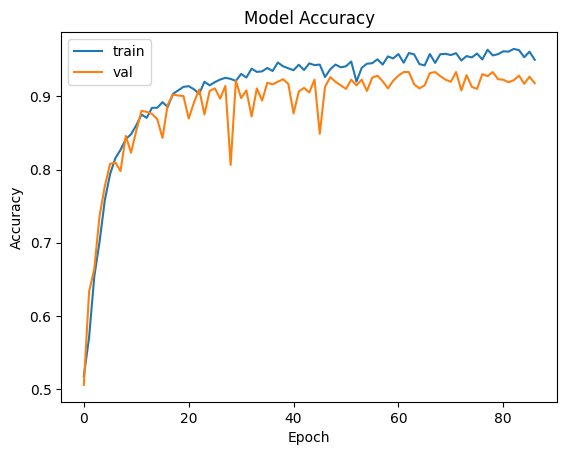

In [62]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

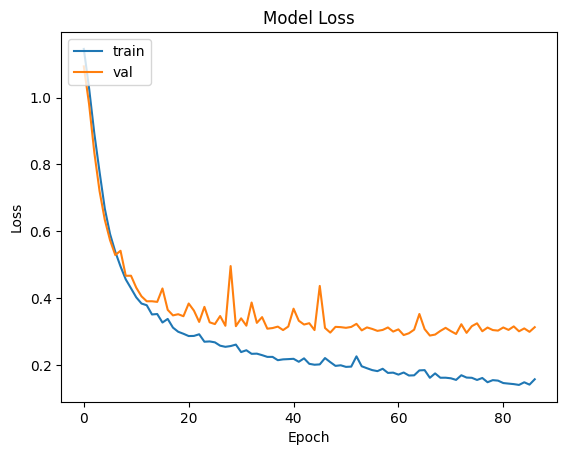

In [63]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

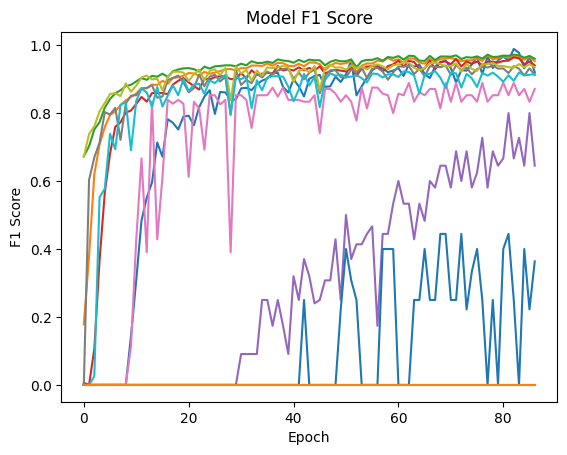

In [64]:
plt.plot(history1.history['f1_score'])
plt.plot(history1.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.show()

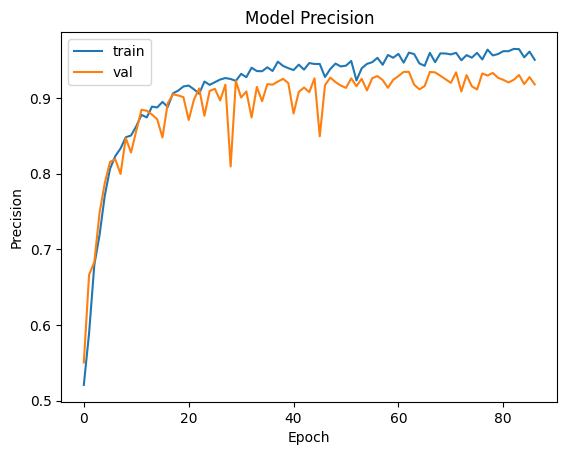

In [65]:
plt.plot(history1.history['precision'])
plt.plot(history1.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [66]:
model1.evaluate(x1_test, y1_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9321 - f1_score: 0.5938 - loss: 0.3473 - precision: 0.9321 


[0.3195625841617584,
 0.9231975078582764,
 <tf.Tensor: shape=(6,), dtype=float32, numpy=
 array([0.85714275, 0.9272236 , 0.94623655, 0.89952147, 0.        ,
        0.        ], dtype=float32)>,
 0.9231975078582764]

In [67]:
model1 = tf.keras.models.load_model(model_save1)
for i in range(5):
    idx = random.randint(0, y1_test.shape[0])
    arr = x1_test[idx]
    _truth = y1_test[idx]
    
    val = np.reshape(arr, (1, *arr.shape))
    _predict = model1.predict(val)
    
    print(f'Prediction: {np.argmax(_predict)}, Ground Truth: {np.argmax(_truth)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Prediction: 2, Ground Truth: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: 2, Ground Truth: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: 3, Ground Truth: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 2, Ground Truth: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 3, Ground Truth: 3


In [68]:
for i in range(5):
    idx = random.randint(0, 6377)
    arr = df_super.iloc[idx, :].to_numpy()
    _truth = series_score_ce.iloc[idx]

    val = np.reshape(arr, (1, *arr.shape, 1))
    _predict = model1.predict(val)
    
    print(f'Prediction: {np.argmax(_predict)}, Ground Truth: {np.argmax(_truth)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: 1, Ground Truth: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: 2, Ground Truth: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 1, Ground Truth: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 3, Ground Truth: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction: 2, Ground Truth: 2


In [69]:
y_pred1 = model1.predict(x1_test)
y_pred = np.argmax(y_pred1, axis=1)

y_test_actual = np.argmax(y1_test, axis=1)

print(precision_score(y_test_actual, y_pred , average="macro", labels=np.unique(y_pred)))
print(f1_score(y_test_actual, y_pred , average="macro", labels=np.unique(y_pred)))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.9183547003714984
0.904971998735163


## CNN 2

In [70]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(x2_train[1].shape, 1),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(6, activation="softmax")
])

In [71]:
cp_callback2 = tf.keras.callbacks.ModelCheckpoint(model_save2, verbose=1, save_weights_only=False, save_best_only=True)
es_callback2 = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [72]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [73]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (1, 38, 32)            │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (1, 19, 32)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (1, 19, 32)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (1, 17, 16)            │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (1, 8, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (1, 8, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (1, 128)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (1, 128)               │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (1, 6)                 │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,966 (74.09 KB)

 Trainable params: 18,966 (74.09 KB)

 Non-trainable params: 0 (0.00 B)

### Training

In [74]:
history2 = model2.fit(x2_train, y2_train, epochs=100, batch_size=64, validation_split=0.25, callbacks=[cp_callback2, es_callback2])

Epoch 1/100
60/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4769 - loss: 1.3850
Epoch 1: val_loss improved from inf to 1.14828, saving model to /kaggle/working/Model_Data/CNN_2.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4813 - loss: 1.3635 - val_accuracy: 0.5059 - val_loss: 1.1483
Epoch 2/100
64/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5172 - loss: 1.1292
Epoch 2: val_loss improved from 1.14828 to 1.13933, saving model to /kaggle/working/Model_Data/CNN_2.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5170 - loss: 1.1296 - val_accuracy: 0.5059 - val_loss: 1.1393
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5213 - loss: 1.1277
Epoch 3: val_loss improved from 1.13933 to 1.12523, saving model to /kaggle/working/Model_Data/CNN_2.keras
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5213 - loss: 1.1275 - val_accuracy: 0.5059 - val_loss: 1.1252
Epoch 4/100
60/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5216 - loss: 1.10

### Results

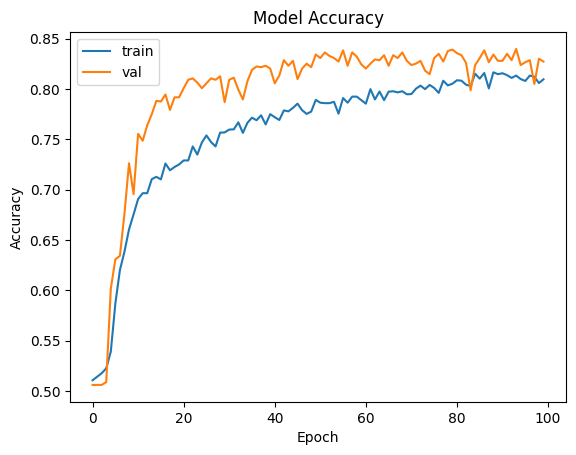

In [75]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

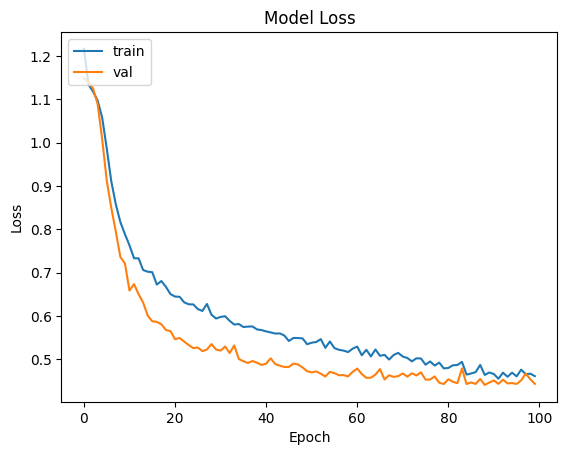

In [76]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [77]:
model2.evaluate(x2_test, y2_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8426 - loss: 0.4649 


[0.4733071029186249, 0.8416928052902222]

In [78]:
model2 = tf.keras.models.load_model(model_save2)
for i in range(5):
    idx = random.randint(0, y2_test.shape[0])
    arr = x2_test[idx]
    _truth = y2_test[idx]
    
    val = np.reshape(arr, (1, *arr.shape))
    _predict = model2.predict(val)
    
    print(f'Prediction: {np.argmax(_predict)}, Ground Truth: {_truth}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Prediction: 1, Ground Truth: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: 3, Ground Truth: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 3, Ground Truth: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: 2, Ground Truth: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction: 3, Ground Truth: 3


In [79]:
for i in range(5):
    idx = random.randint(0, 6377)
    arr = df_super.iloc[idx, :].to_numpy()
    _truth = series_score.iloc[idx]

    val = np.reshape(arr, (1, *arr.shape, 1))
    _predict = model2.predict(val)
    
    print(f'Prediction: {np.argmax(_predict)}, Ground Truth: {_truth}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction: 3, Ground Truth: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction: 2, Ground Truth: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: 2, Ground Truth: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: 2, Ground Truth: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: 2, Ground Truth: 2


In [80]:
y_pred1 = model2.predict(x2_test)
y_pred = np.argmax(y_pred1, axis=1)

print(precision_score(y2_test, y_pred , average="macro", labels=np.unique(y_pred)))
print(f1_score(y2_test, y_pred , average="macro", labels=np.unique(y_pred)))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.8681078629578941
0.6805759700520024
